In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Cargar el archivo Excel
ruta_archivo = 'C:/Users/Usuario/Desktop/Dataset con ETL.xlsx'

df = pd.read_excel(ruta_archivo)

df

,Años,Total,Comerciales,Residenciales,Industriales
0,1993,254993,15112,139776,17536
1,1994,270770,20548,160931,16005
2,1995,303093,48281,146856,28734
3,1996,289477,23842,179199,10305
4,1997,317963,39660,179117,14444
5,1998,299754,28845,172958,17699
6,1999,325535,31701,183165,13489
7,2000,360713,32494,205821,14400
8,2001,369288,33961,205226,13505
9,2002,373670,34071,216387,13381


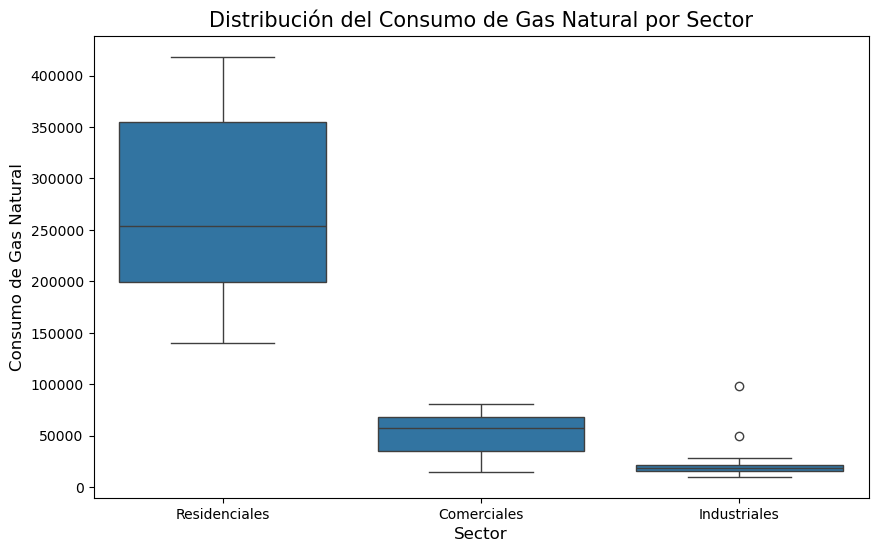

In [118]:
# Crear un DataFrame en formato 'long' para facilitar el gráfico
df_long = df.melt(value_vars=['Residenciales', 'Comerciales', 'Industriales'], 
                  var_name='Sector', 
                  value_name='Consumo')

# Crear el gráfico de caja para las tres variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Consumo', data=df_long)

# Personalizar el gráfico
plt.title('Distribución del Consumo de Gas Natural por Sector', fontsize=15)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Consumo de Gas Natural', fontsize=12)

# Mostrar el gráfico
plt.show()

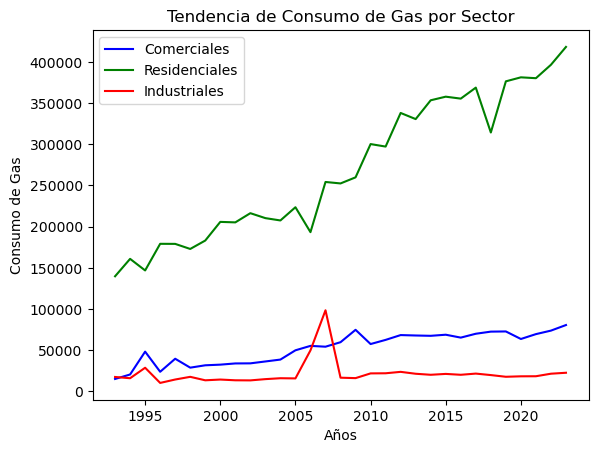

In [120]:
import matplotlib.pyplot as plt

# Gráfico de líneas para los tres sectores
plt.plot(df['Años'], df['Comerciales'], label='Comerciales', color='blue')
plt.plot(df['Años'], df['Residenciales'], label='Residenciales', color='green')
plt.plot(df['Años'], df['Industriales'], label='Industriales', color='red')

plt.xlabel('Años')
plt.ylabel('Consumo de Gas')
plt.title('Tendencia de Consumo de Gas por Sector')
plt.legend()
plt.show()

## Modelo de Random Forest (Bosques Aleatorios)

In [122]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Variables independientes (puedes ajustar estas según tus datos)
X = df[['Años', 'Comerciales', 'Residenciales', 'Industriales']]

# Variable dependiente (Consumo de gas)
y = df['Total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE (Bosques Aleatorios): {mse_rf}")
print(f"R² (Bosques Aleatorios): {r2_rf}")

MSE (Bosques Aleatorios): 717682154.0494715
R² (Bosques Aleatorios): 0.9635306798539336


##### 717,682,154, lo que indica que, aunque el error es considerable en términos absolutos (dado el tamaño de los datos), sigue siendo razonable para un conjunto de predicciones que involucran grandes valores de consumo.
##### 0.9635, lo que significa que el modelo es capaz de explicar el 96.35% de la variabilidad en los datos. Esto indica un muy buen ajuste del modelo.